In [1]:
#streamlit run /Users/siddthekidd/Documents/Projects/.venv/ticker_app.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf #version 2.54.1

/Users/siddthekidd/Documents/Projects/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
##Download data from yahoo finance
#Date range
start = '2020-01-01'
end = pd.to_datetime('today').strftime('%Y-%m-%d')

#Stock name
stock = 'SPY'

data = yf.download(stock, start=start, end=end)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-01-02,300.291565,300.310070,298.128604,299.062200,59151200
2020-01-03,298.017670,299.154623,296.806782,296.862240,77709700
2020-01-06,299.154572,299.237759,296.122697,296.242867,55653900
2020-01-07,298.313507,299.062223,297.860559,298.581546,40496400
2020-01-08,299.903351,301.132716,298.258020,298.507583,68296000


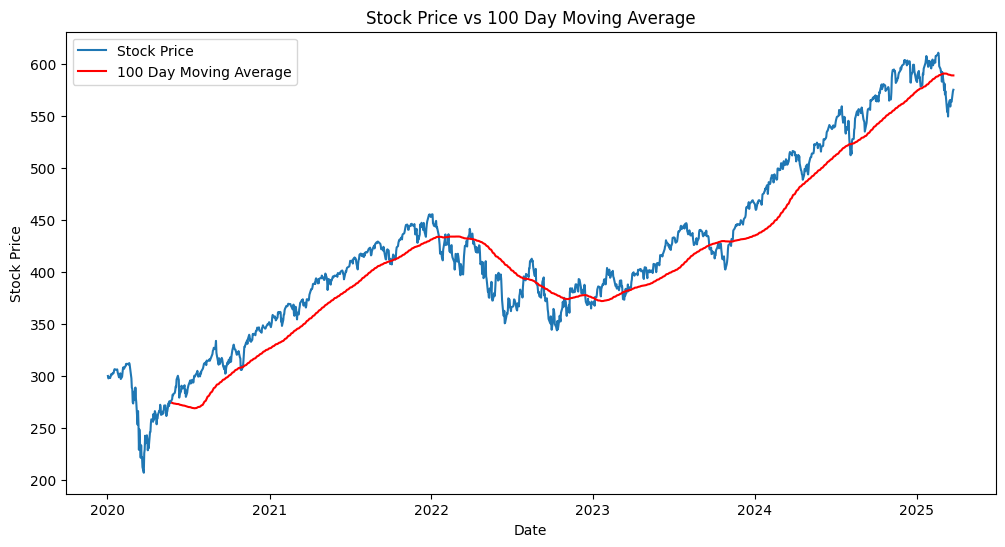

In [3]:
#Create 100 day SMA
ma100 = data['Close'].rolling(100).mean()

#Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Stock Price')
plt.plot(ma100, label='100 Day Moving Average', color='red')
plt.title('Stock Price vs 100 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()

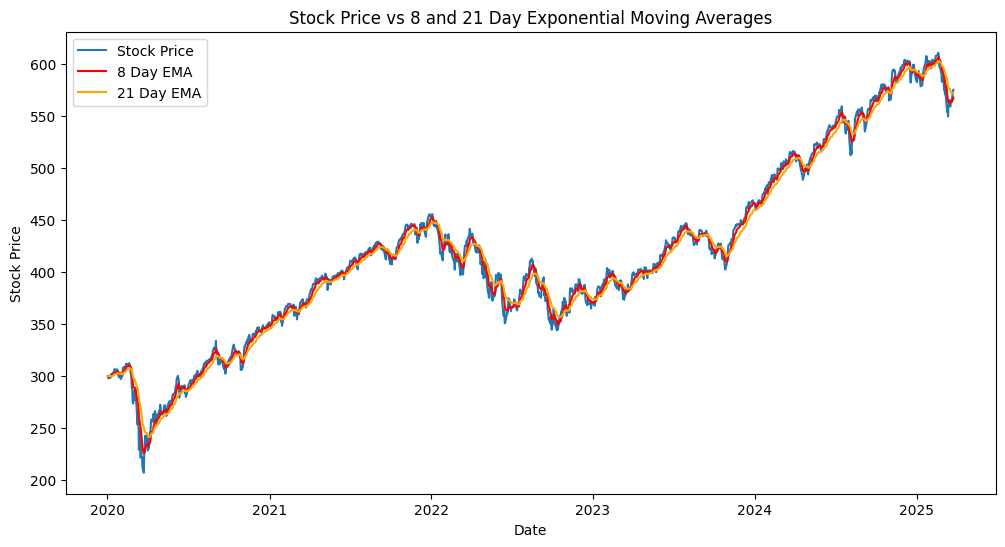

In [4]:
#Create 8 and 21 day exponential moving averages
data['EMA8'] = data['Close'].ewm(span=8, adjust=False).mean()
data['EMA21'] = data['Close'].ewm(span=21, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Stock Price')
plt.plot(data['EMA8'], label='8 Day EMA', color='red')
plt.plot(data['EMA21'], label='21 Day EMA', color='orange')
plt.title('Stock Price vs 8 and 21 Day Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()

In [5]:
##Create training and test data, 80% training and 20% test
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame((data.Close[int(len(data)*0.80): len(data)]))

#data_test.shape
#data_train.shape

In [6]:
##Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_train_scale = scaler.fit_transform(data_train)
data_test_scale = scaler.transform(data_test)

In [7]:
##Create array for training data
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

In [8]:
x, y = np.array(x), np.array(y)

In [9]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [10]:
#Build neural network model, 4 different LSTM layers
model = Sequential()

#50 units
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

#60 units
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

#80 units
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

#120 units
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #Only 1 output

/Users/siddthekidd/Documents/Projects/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Fit model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2460
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0220
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0179
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0137
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0141
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0111
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0106
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0102
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0128
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0109
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0110
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0099
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0101
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0088
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0101
Epoc

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [14]:
#Test model strength against test data
pas_100_days = data_train.tail(100)

data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

data_test_scale = scaler.transform(data_test)

In [15]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [16]:
y_predict = model.predict(x)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [17]:
scale = 1/scaler.scale_
y_predict = y_predict*scale
y = y*scale
y

array([299.4712677 , 296.42958069, 295.9964447 , 301.41053772,
       300.6131134 , 299.6091156 , 296.12840271, 299.12031555,
       301.93458557, 306.64451599, 308.34294128, 307.36540222,
       305.94346619, 304.99552917, 309.30076599, 309.20201111,
       308.3033905 , 305.0252533 , 305.5879364 , 299.3276825 ,
       304.62028503, 304.90666199, 305.49919128, 300.36448669,
       304.19581604, 297.13557434, 290.81602478, 289.90757751,
       286.9650116 , 285.94798279, 281.64277649, 286.14549255,
       292.0009613 , 291.76396179, 289.86805725, 294.57817078,
       296.35554504, 288.37705994, 286.76756287, 291.38871765,
       297.5700531 , 302.78370667, 303.34657288, 303.39588928,
       306.33836365, 307.00004578, 307.06919861, 309.42912292,
       315.82774353, 314.75132751, 315.50187683, 316.10417175,
       317.38780212, 315.87712097, 312.05570984, 315.4919281 ,
       315.85734558, 312.19395447, 308.74778748, 313.44798279,
       313.87260437, 314.45518494, 320.65623474, 320.64

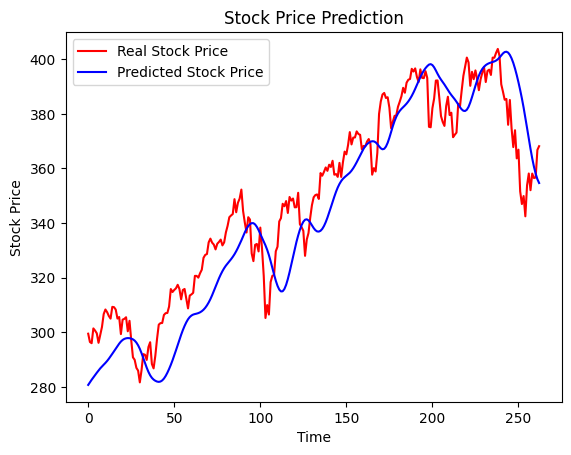

In [18]:
plt.figure
plt.plot(y, color='red', label='Real Stock Price')
plt.plot(y_predict, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
model.save('stock_price_prediction.keras')